In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from linearmodels.panel import PanelOLS

# TASK 1: Data Management, Cleaning and Analysis

## 1.1 Data Cleaning and Manipulation

1. Load “Africa_gdp.dta”

In [2]:
path_afgdp = './Africa_gdp.dta'
Africa_gdp = pd.read_stata(path_afgdp)
Africa_gdp.head()

/var/folders/rj/zvrgtb452zzf5rvlqthd6n300000gn/T/ipykernel_20105/2809754621.py:2: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  Africa_gdp = pd.read_stata(path_afgdp)


,CountryName,CountryCode,LongName,IncomeGroup,Region,year,gdp_pc_k,gdp_pc_c,va_c,va_k,emp_ratio,gdp_pwkr,pop,wkrs,va_c_pwkr,va_k_pwkr,povgap_rate_2day,pov_rate_1day,povgap_rate_1day,pov_rate_2day
0,Algeria,DZA,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,1986,2741.682670,2705.946030,5.808167e+10,6.270349e+10,NaN,15161.0,23539383.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,DZA,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,1994,2265.893267,1479.600215,3.904846e+10,6.439152e+10,33.400002,9974.0,28752749.0,9603419.0,4066.100098,6705.062500,NaN,NaN,NaN,NaN
2,Algeria,DZA,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,2001,2567.150874,1702.780079,5.234901e+10,8.052438e+10,31.600000,9871.0,32150198.0,10159463.0,5152.734375,7926.046387,NaN,NaN,NaN,NaN
3,Algeria,DZA,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,2000,2487.286034,1727.333251,5.180308e+10,7.858146e+10,30.700001,9883.0,31719449.0,9737871.0,5319.754395,8069.675781,NaN,NaN,NaN,NaN
4,Algeria,DZA,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,2002,2675.725212,1742.557610,5.361717e+10,8.385565e+10,32.099998,10085.0,32572977.0,10455925.0,5127.922363,8019.916504,NaN,NaN,NaN,NaN


2. Create a variable (call it WB2code) that includes the 2-digit World Bank country code for
each country. You can find these country codes in the file “Africa_countries_codes.xlsx”
Assign a numeric code using variable name NumCode to each country, with each number
reflecting the rank of the country in alphabetical order.

In [3]:
path_ccodes = './Africa_countries_codes.xlsx'
df_ccodes = pd.read_excel(path_ccodes)
df_ccodes['NumCode'] = df_ccodes['CountryName'].rank(method='min').astype(int)

Africa_gdp = pd.merge(Africa_gdp, df_ccodes, on=['CountryName','CountryCode'], how='left')

Africa_gdp.head()

,CountryName,CountryCode,LongName,IncomeGroup,Region,year,gdp_pc_k,gdp_pc_c,va_c,va_k,...,pop,wkrs,va_c_pwkr,va_k_pwkr,povgap_rate_2day,pov_rate_1day,povgap_rate_1day,pov_rate_2day,WB2code,NumCode
0,Algeria,DZA,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,1986,2741.682670,2705.946030,5.808167e+10,6.270349e+10,...,23539383.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DZ,1
1,Algeria,DZA,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,1994,2265.893267,1479.600215,3.904846e+10,6.439152e+10,...,28752749.0,9603419.0,4066.100098,6705.062500,NaN,NaN,NaN,NaN,DZ,1
2,Algeria,DZA,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,2001,2567.150874,1702.780079,5.234901e+10,8.052438e+10,...,32150198.0,10159463.0,5152.734375,7926.046387,NaN,NaN,NaN,NaN,DZ,1
3,Algeria,DZA,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,2000,2487.286034,1727.333251,5.180308e+10,7.858146e+10,...,31719449.0,9737871.0,5319.754395,8069.675781,NaN,NaN,NaN,NaN,DZ,1
4,Algeria,DZA,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,2002,2675.725212,1742.557610,5.361717e+10,8.385565e+10,...,32572977.0,10455925.0,5127.922363,8019.916504,NaN,NaN,NaN,NaN,DZ,1


3. Generate a new variable (name it LName) with each country’s value of LongName but, with
the words “of” and “the” removed.

In [4]:
Africa_gdp['LName'] = Africa_gdp['LongName'].str.replace('of ', '').str.replace('the ', '')
Africa_gdp.head()

,CountryName,CountryCode,LongName,IncomeGroup,Region,year,gdp_pc_k,gdp_pc_c,va_c,va_k,...,wkrs,va_c_pwkr,va_k_pwkr,povgap_rate_2day,pov_rate_1day,povgap_rate_1day,pov_rate_2day,WB2code,NumCode,LName
0,Algeria,DZA,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,1986,2741.682670,2705.946030,5.808167e+10,6.270349e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DZ,1,People's Democratic Republic Algeria
1,Algeria,DZA,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,1994,2265.893267,1479.600215,3.904846e+10,6.439152e+10,...,9603419.0,4066.100098,6705.062500,NaN,NaN,NaN,NaN,DZ,1,People's Democratic Republic Algeria
2,Algeria,DZA,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,2001,2567.150874,1702.780079,5.234901e+10,8.052438e+10,...,10159463.0,5152.734375,7926.046387,NaN,NaN,NaN,NaN,DZ,1,People's Democratic Republic Algeria
3,Algeria,DZA,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,2000,2487.286034,1727.333251,5.180308e+10,7.858146e+10,...,9737871.0,5319.754395,8069.675781,NaN,NaN,NaN,NaN,DZ,1,People's Democratic Republic Algeria
4,Algeria,DZA,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,2002,2675.725212,1742.557610,5.361717e+10,8.385565e+10,...,10455925.0,5127.922363,8019.916504,NaN,NaN,NaN,NaN,DZ,1,People's Democratic Republic Algeria


4. Generate a table where the first column is the CountryCode variable, the second and third
columns should be the averages over time of gdp_pc_k and gdp_pc_c for every country.
Export the table in publishable format as an excel file and name it “average_gdp.xlsx” (or
“.csv”)

In [5]:
average_gdp = Africa_gdp.groupby('CountryCode')[['gdp_pc_k', 'gdp_pc_c']].mean().reset_index()
average_gdp.to_csv('./Output/average_gdp.csv', index=False)
average_gdp.head()

,CountryCode,gdp_pc_k,gdp_pc_c
0,AGO,1635.903474,1616.117039
1,BDI,173.193725,147.284087
2,BEN,468.585863,322.861981
3,BFA,289.354781,248.583414
4,BWA,2943.192263,2159.033709


5. Load the “WDI_Agriculture_VA.csv”. Change the format of data from wide to date wise
long format, with Year on one column and Agriculture constant values on the other. 

In [6]:
path_agri = './WDI_Agricultural_VA.csv'
WDI_Agriculture_VA = pd.read_csv(path_agri, encoding='latin-1')


column_to_move = WDI_Agriculture_VA.pop('Country Code')
WDI_Agriculture_VA.insert(3, 'Country Code', column_to_move)

WDI_Agriculture_VA = WDI_Agriculture_VA.iloc[:, 3:58]
WDI_Agriculture_VA = pd.melt(WDI_Agriculture_VA, id_vars=['Country Code'], 
                             var_name='Year', value_name='Agri_const')
WDI_Agriculture_VA = WDI_Agriculture_VA.rename(columns = {'Country Code':'CountryCode', 'Year':'year'})

WDI_Agriculture_VA.head()

,CountryCode,year,Agri_const
0,AGO,1960,NaN
1,BDI,1960,NaN
2,BEN,1960,NaN
3,BFA,1960,NaN
4,BWA,1960,47446890.97


6. Merge the WDI_Agriculture_VA dataset with the Africa_gdp dataset by Year and Country.
Export the dataset and name it “Africa_merged.xlsx” (or .csv). Make sure you preserve this
dataset.

In [7]:
WDI_Agriculture_VA['year'] = WDI_Agriculture_VA['year'].astype(int)
Africa_merged = pd.merge(Africa_gdp, WDI_Agriculture_VA, on=['year', 'CountryCode'], how='inner')
Africa_merged.to_csv('./Output/Africa_merged.csv', index=False)
Africa_merged.head()

,CountryName,CountryCode,LongName,IncomeGroup,Region,year,gdp_pc_k,gdp_pc_c,va_c,va_k,...,va_c_pwkr,va_k_pwkr,povgap_rate_2day,pov_rate_1day,povgap_rate_1day,pov_rate_2day,WB2code,NumCode,LName,Agri_const
0,Algeria,DZA,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,1986,2741.682670,2705.946030,5.808167e+10,6.270349e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,DZ,1,People's Democratic Republic Algeria,3.290220e+09
1,Algeria,DZA,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,1994,2265.893267,1479.600215,3.904846e+10,6.439152e+10,...,4066.100098,6705.062500,NaN,NaN,NaN,NaN,DZ,1,People's Democratic Republic Algeria,4.108044e+09
2,Algeria,DZA,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,2001,2567.150874,1702.780079,5.234901e+10,8.052438e+10,...,5152.734375,7926.046387,NaN,NaN,NaN,NaN,DZ,1,People's Democratic Republic Algeria,6.234955e+09
3,Algeria,DZA,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,2000,2487.286034,1727.333251,5.180308e+10,7.858146e+10,...,5319.754395,8069.675781,NaN,NaN,NaN,NaN,DZ,1,People's Democratic Republic Algeria,5.504267e+09
4,Algeria,DZA,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,2002,2675.725212,1742.557610,5.361717e+10,8.385565e+10,...,5127.922363,8019.916504,NaN,NaN,NaN,NaN,DZ,1,People's Democratic Republic Algeria,6.160136e+09


Generate a separate timeseries dataset which depicts the average constant and current GDP per
capita (gdp_pc_k and gdp_pc_c) of Africa from 1960 to 2013. Export the table in excel format
and name it “Africa_gdp_timeseries.xlsx” (or .csv)

In [8]:
Africa_gdp_timeseries = Africa_merged.groupby('year')[['gdp_pc_k', 'gdp_pc_c']].mean().reset_index()
Africa_gdp_timeseries.to_excel('./Output/Africa_gdp_timeseries.xlsx', index=False)
Africa_gdp_timeseries.head()

,year,gdp_pc_k,gdp_pc_c
0,1960,769.734104,142.309415
1,1961,769.715250,146.418817
2,1962,782.265574,147.722151
3,1963,815.678614,158.102869
4,1964,842.653373,164.102867


8. Generate a separate data set of the following variables average by country:
i) GDP per capita (current)
ii) GDP per capita (constant)
iii) Agriculture value (constant)
Save and export the dataset as “Africa_country_average.xlsx” (or .csv). Make sure to retain the region
variable.

In [9]:
Africa_country_average = Africa_merged.groupby(['CountryCode', 'CountryName', 'Region']
                                              )[['gdp_pc_c', 'gdp_pc_k', 'Agri_const']].mean().reset_index()    
Africa_country_average.to_csv('./Output/Africa_country_average.csv', index=False)
Africa_country_average.head()

,CountryCode,CountryName,Region,gdp_pc_c,gdp_pc_k,Agri_const
0,AGO,Angola,Sub-Saharan Africa,1616.117039,1635.903474,2.059899e+09
1,BDI,Burundi,Sub-Saharan Africa,147.284087,173.193725,4.560424e+08
2,BEN,Benin,Sub-Saharan Africa,322.861981,468.585863,8.350932e+08
3,BFA,Burkina Faso,Sub-Saharan Africa,248.583414,289.354781,1.093897e+09
4,BWA,Botswana,Sub-Saharan Africa,2159.033709,2943.192263,1.544154e+08


## 1.2 Data Exploration

1. Using the Africa_gdp_timeseries dataset, generate line graph of average constant and current
GDP per capita against time for Africa. On a particular year, the average GDP per capita seem
to increase drastically. On what year does there seem to be a drastic increase? Indicate the year
on the plot. Format your graphs so that they are publication quality and save them as .pdf files.

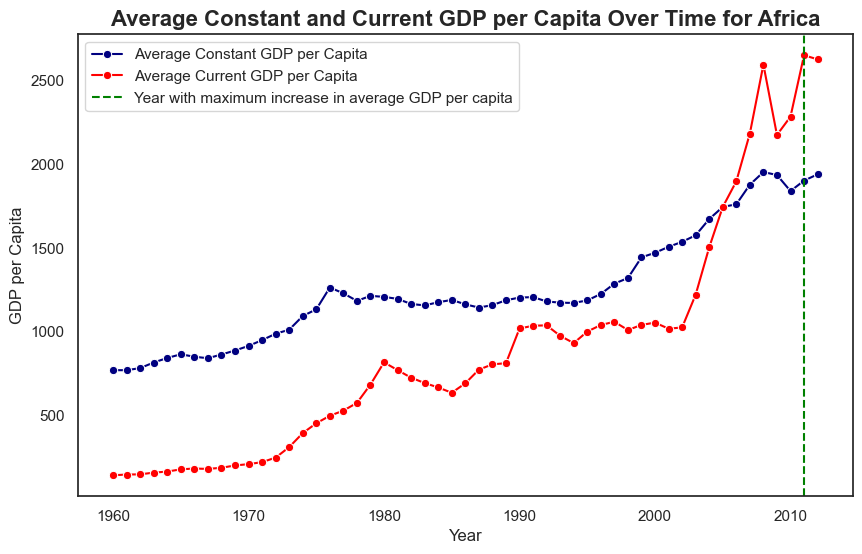

In [10]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.lineplot(x='year', y='gdp_pc_k', data=Africa_gdp_timeseries, label='Average Constant GDP per Capita',
                  marker='o', color = 'navy')
ax = sns.lineplot(x='year', y='gdp_pc_c', data=Africa_gdp_timeseries, label='Average Current GDP per Capita',
                  marker='o', color = 'red')
ax.set_title('Average Constant and Current GDP per Capita Over Time for Africa', fontsize=16, fontweight='bold')
increase_year = Africa_gdp_timeseries.loc[(Africa_gdp_timeseries['gdp_pc_c'] - Africa_gdp_timeseries['gdp_pc_k']
                                          ).idxmax(), 'year']
plt.axvline(x=increase_year, color='green', linestyle='--', 
            label=f'Year with maximum increase in average GDP per capita')
ax.set_xlabel('Year')
ax.set_ylabel('GDP per Capita')
ax.legend()
ax.grid(False)
plt.savefig("./Output/GDP per capita increase over time.pdf", format='pdf',bbox_inches="tight")
plt.show()

2. Using the Africa_country_average dataset, create side-by-side bar graphs of constant and
current GDP per capita for all countries in the Middle East and North Africa Region. Format
your graphs so that they are publication quality and save them as .pdf files.

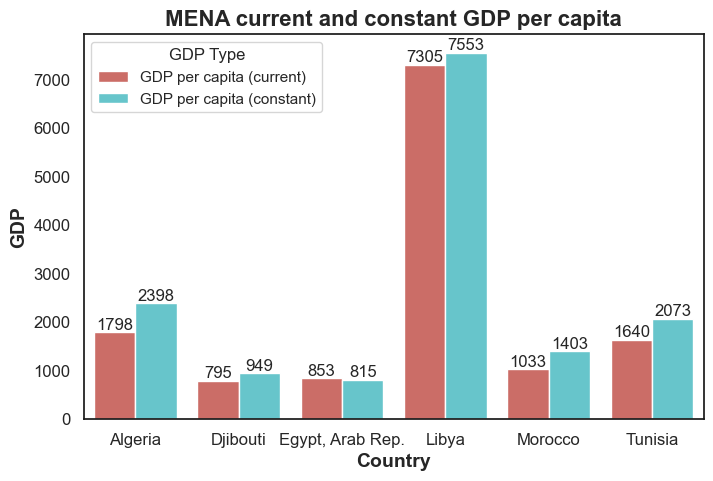

In [11]:
MENA = Africa_country_average[Africa_country_average['Region'] == 'Middle East & North Africa']
MENA = MENA.drop(['Agri_const'], axis=1)
MENA = pd.melt(MENA, id_vars=['CountryCode', 'CountryName', 'Region'], var_name='GDP_Type', value_name='GDP')
MENA = MENA.sort_values('CountryName')
MENA['GDP_Type'] = MENA['GDP_Type'].map({'gdp_pc_k': 'GDP per capita (constant)', 
                                         'gdp_pc_c': 'GDP per capita (current)'})


sns.set()
fig, ax=plt.subplots(figsize=(8,5))
ax = sns.barplot(x='CountryName', y='GDP', hue='GDP_Type', palette=('hls'), data=MENA)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,
                 bar.get_height()), ha='center', va='center',size=12, xytext=(0, 5),
                textcoords='offset points')
ax.set_title('MENA current and constant GDP per capita', 
             fontsize=16, fontweight='bold')
ax.set_xlabel('Country', fontsize=14, fontweight='bold')
ax.set_ylabel('GDP', fontsize=14, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_facecolor('white')
ax.spines[['top', 'bottom', 'left', 'right']].set_color('k')
ax.grid(False)
ax.legend(loc='best', title='GDP Type', facecolor='white')
plt.savefig("./Output/MENA GDP per Capita.pdf", format='pdf',bbox_inches="tight")
plt.show();

3. Generate scatter plots for:
i) GDP per capita (constant) on Poverty rate(1day)
ii) GDP per capita(constant) on Employment ratio
Interpret these graphs and format them as a single pdf file.

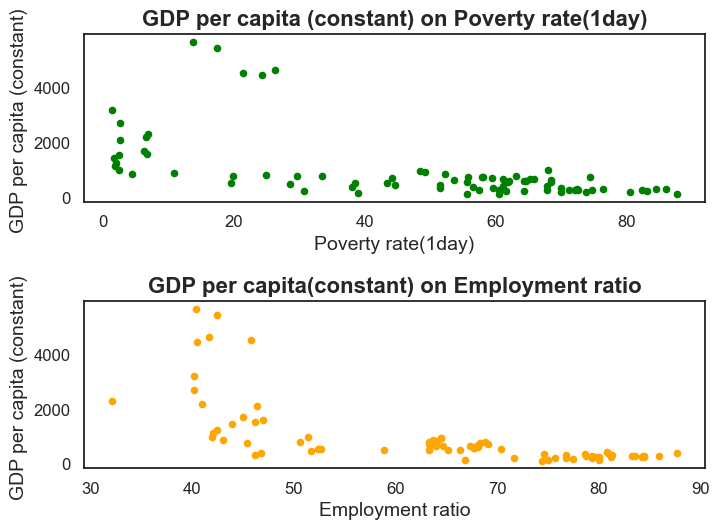

In [12]:
fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(8,6))
fig.tight_layout(pad=4)
ax[0] = Africa_merged.dropna().plot.scatter(x='pov_rate_1day', y='gdp_pc_k', ax=ax[0], color='green', fontsize=12)
ax[0].set_xlabel('Poverty rate(1day)', fontsize=14)
ax[0].set_ylabel('GDP per capita (constant) ', fontsize=14)
ax[0].set_facecolor('white')
ax[0].spines[['top','bottom','left','right']].set_color('k')
ax[0].set_title('GDP per capita (constant) on Poverty rate(1day)', fontsize=16, fontweight='bold')
ax[0].grid(False)

ax[1] = Africa_merged.dropna().plot.scatter(x='emp_ratio', y='gdp_pc_k', ax=ax[1], color='orange', fontsize=12)
ax[1].set_xlabel('Employment ratio', fontsize=14)
ax[1].set_ylabel('GDP per capita (constant) ', fontsize=14)
ax[1].set_facecolor('white')
ax[1].spines[['top','bottom','left','right']].set_color('k')
ax[1].set_title('GDP per capita(constant) on Employment ratio', fontsize=16, fontweight='bold')
ax[1].grid(False)

plt.savefig("./Output/GDP on poverty and employment rate.pdf", format='pdf',bbox_inches="tight")
plt.show();

Interpretation: The plot on GDP per capita on poverty rate shows an increase in poverty rate with decrease in GDP per capita with few outliers. The plot on GDP per capital on Employment ratio shows an increase in employment ratio when GDP per capita is lower. Neither of the plots can confirm any kind of linear relationship.

## 1.3 Estimation and Causal Inference

1.  Using the main dataset (Africa_merged), run the following linear regression and create a single
table in Excel with the coefficients and main statistics (R2, no. of obs). Name the Excel file
“Poverty regression”.
a. Poverty rate (1 day) on GDP (constant) per capita. Interpret the result. Would you say
that the estimated effect is causal in nature? Explain.
For the above regression, write out a simple econometric model.

In [13]:
ols_model = smf.ols('pov_rate_1day ~ gdp_pc_k', data = Africa_merged.dropna()).fit()
print(ols_model.summary())

Poverty_regression = pd.DataFrame({
    'Coefficient': ols_model.params,
    'Standard Error': ols_model.bse,
    't-value': ols_model.tvalues,
    'p-value': ols_model.pvalues,
})

Poverty_regression['R-squared'] = ols_model.rsquared
Poverty_regression['No. of Observations'] = ols_model.nobs
Poverty_regression.to_excel('./Output/Poverty_regression.xlsx', index=True)

                            OLS Regression Results                            
Dep. Variable:          pov_rate_1day   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     39.82
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           1.50e-08
Time:                        05:44:50   Log-Likelihood:                -361.94
No. Observations:                  81   AIC:                             727.9
Df Residuals:                      79   BIC:                             732.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.3075      3.073     19.300      0.0

Interpretation: With 1 unit increase on GDP per capita (constant), the poverty rate decreases by 1.26%. Though the p-value shows statistically significant result (at alpha = 0.01), due to R-squared value being only 33.5%, we cannot confirm any causal relation though there is a correlation. Also, it is very unlikey to confirm causation by just reviewing the regression results.

Econometric model, Y = beta0 + beta1X + e, 
where Y is the poverty rate (1 day) and X is GDP per capita (constant).

2. Suppose you estimate the model using OLS and obtain a coefficient of 0.1 with a standard error
of 0.02. Interpret this result.

One unit increase in the independent variable is associated with a 0.1 unit increase in the dependent variable. Standard error of 0.02 shows that there is a some level of uncertainity. If p-value is under the set alpha (mostly at 0.01), with a t-value of 5 (0.1/0.02) the result would be statistically significant.

3. The effect of GDP per capita on Poverty is likely non-linear. Explain how you would modify
the above model to estimate any potential non-linearities.

The model could be modified by introducing non-linear terms like (gdd per capita)^2. This would also help in identifying the peak and low points of the curve. In this case considering independent variable gdp per capita as X and dependent variable poverty as Y by introducting the non-linear term the equation can be re-written as: 

Y = beta0 + beta1 X + beta2 (X)^2 + e

4. Create a categorical variable with the levels of IncomeGroup, where 1 is poorest and 4 is
wealthiest (call it IncGrp). Run the following regressions. Create a single table in Excel with
each column showing the coefficients for regressions (a) and (b) and main statistics (R2, no. of
obs). Name the Excel file “Income group regressions 1 and 2.xlsx (csv)”. Create another
table with the marginal effects of regression (c). Name the Excel file “Income group
regression 3”. The models to be run are:
a. OLS of Employment ratio on dummies for each Income group
b. OLS of Employment ratio on dummies for each Income group, and an interaction term
between income groups and constant GDP per capita.
c. Create a dummy variable identifying the rich countries (those with values of IncGrp =
3 and IncGrp = 4) and zero for the rest (name this variable rich). Run a probit of rich
on Employment ratio and total workers (wrks) [you can ignore the time dimension of
the dataset so just pool all observations across years].

In [14]:
Africa_merged.loc[Africa_merged['IncomeGroup']=='High income: nonOECD', 'IncGrp'] = 4
Africa_merged.loc[Africa_merged['IncomeGroup']=='Upper middle income', 'IncGrp'] = 3
Africa_merged.loc[Africa_merged['IncomeGroup']=='Lower middle income', 'IncGrp'] = 2
Africa_merged.loc[Africa_merged['IncomeGroup']=='Low income', 'IncGrp'] = 1

ols_model_a = smf.ols('emp_ratio ~ IncGrp', data=Africa_merged).fit()
ols_model_b = smf.ols('emp_ratio ~ IncGrp + IncGrp * gdp_pc_k', data=Africa_merged).fit()
print(ols_model_a.summary())
print(ols_model_b.summary())

Income_group_regressions_1_and_2 = pd.DataFrame({
    'Model (a) Coefficients': ols_model_a.params,
    'Model (b) Coefficients': ols_model_b.params,
    'Model (a) R-squared': ols_model_a.rsquared,
    'Model (b) R-squared': ols_model_b.rsquared,
    'Model (a) No. of Observations': ols_model_a.nobs,
    'Model (b) No. of Observations': ols_model_b.nobs,
})

Income_group_regressions_1_and_2.to_excel('./Output/Income_group_regressions_1_and_2.xlsx', index=True)

                            OLS Regression Results                            
Dep. Variable:              emp_ratio   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     378.7
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           1.07e-72
Time:                        05:44:50   Log-Likelihood:                -4297.1
No. Observations:                1100   AIC:                             8598.
Df Residuals:                    1098   BIC:                             8608.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     76.6497      0.827     92.682      0.0

In [15]:
Africa_merged['rich'] = (Africa_merged['IncGrp'].isin([3, 4])).astype(int)
probit_model = smf.probit('rich ~ emp_ratio + wkrs', data=Africa_merged).fit()
print(probit_model.summary())
Income_group_regression_3 = probit_model.get_margeff().summary_frame()
Income_group_regression_3.to_excel('./Output/Income_group_regression_3.xlsx', index=True)

Optimization terminated successfully.
         Current function value: 0.389190
         Iterations 9
                          Probit Regression Results                           
Dep. Variable:                   rich   No. Observations:                 1144
Model:                         Probit   Df Residuals:                     1141
Method:                           MLE   Df Model:                            2
Date:                Wed, 22 Nov 2023   Pseudo R-squ.:                  0.2050
Time:                        05:44:50   Log-Likelihood:                -445.23
converged:                       True   LL-Null:                       -560.05
Covariance Type:            nonrobust   LLR p-value:                 1.370e-50
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8905      0.219      8.641      0.000       1.462       2.319
emp_ratio     -0.0413      0.

5. Run a fixed-effects regression of constant GDP per capita on employment ratio with country-
specific fixed effects, and create a single table in Excel. Name the Excel file “Fixed effect
regression.xlsx (.csv)”.

In [16]:
Africa_merged['year'] = pd.to_datetime(Africa_merged['year'], format='%Y')
panel_data = Africa_merged.set_index(['CountryCode', 'year'])
fe_model = PanelOLS.from_formula('gdp_pc_k ~ emp_ratio + EntityEffects', panel_data).fit()
fe_results = fe_model.summary.tables[1]
print(fe_results)
Fixed_effect_regression = pd.DataFrame(fe_results.data)
Fixed_effect_regression.to_excel("./Output/Fixed_effect_regression.xlsx", index=True)

                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
emp_ratio      5.5807     14.011     0.3983     0.6905     -21.911      33.073


/Users/harisankar/opt/anaconda3/lib/python3.9/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


# TASK 2: Geospatial and Open-Source Section 

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm
from matplotlib.colorbar import ColorbarBase
from shapely.geometry import Polygon

In [18]:
data_path = '/Users/harisankar/Work/Harris/Job/EPIC India/AQLI Data Test/gadm2_aqli_1998_2021.csv'
df_aqi = pd.read_csv(data_path)
df_aqi.head()

,objectid_gadm2,iso_alpha3,country,name_1,name_2,population,whostandard,natstandard,pm1998,pm1999,...,llpp_nat_2012,llpp_nat_2013,llpp_nat_2014,llpp_nat_2015,llpp_nat_2016,llpp_nat_2017,llpp_nat_2018,llpp_nat_2019,llpp_nat_2020,llpp_nat_2021
0,1,AFG,Afghanistan,Badakhshan,Baharak,95535.0,5,35.0,8.29,9.31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,AFG,Afghanistan,Badakhshan,Darwaz,27665.0,5,35.0,8.19,8.14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,AFG,Afghanistan,Badakhshan,Fayzabad,302299.0,5,35.0,7.83,8.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,AFG,Afghanistan,Badakhshan,Ishkashim,18326.0,5,35.0,8.20,9.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,AFG,Afghanistan,Badakhshan,Jurm,94396.0,5,35.0,8.28,9.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2.1 Basic wrangling tasks and questions

1. How many GADM2 regions are present in India?

In [19]:
df_aqi_india = df_aqi[df_aqi['country'] == 'India']
num_gadm2 = df_aqi_india['objectid_gadm2'].nunique()
print(f'The number of GADM2 regions in India are {num_gadm2}')

The number of GADM2 regions in India are 690


2. Calculate population weighted pollution average of all years at country (GADM0) level.
a. Save the country level file as a CSV.
b. What are the 10 most polluted countries in 2021?

In [21]:
years = [col for col in df_aqi.columns if col.startswith('pm')]
for year in years:
    df_aqi[f'weighted_avg_{year}'] = df_aqi[year] * df_aqi['population']
    
grouped_aqi = df_aqi.groupby('country')[[f'weighted_avg_{year}' for year in years] + ['population']].sum()

for year in years:
    grouped_aqi[f'pop_weighted_avg_{year}'] = grouped_aqi[f'weighted_avg_{year}'] / grouped_aqi['population']

grouped_aqi.to_csv('/Users/harisankar/Work/Harris/Job/EPIC India/AQLI Data Test/Output/Country level population weighted avg.csv', index=False)    
    
most_polluted_2021 = grouped_aqi.sort_values(by='pop_weighted_avg_pm2021', ascending=False).head(10)
most_polluted_2021['pop_weighted_avg_pm2021'] = most_polluted_2021['pop_weighted_avg_pm2021'].round(2)
print('The 10 most polluted countries in 2021 are:')
print(most_polluted_2021[['pop_weighted_avg_pm2021']])

The 10 most polluted countries in 2021 are:
                                  pop_weighted_avg_pm2021
country                                                  
Bangladesh                                          73.96
India                                               58.70
Nepal                                               51.71
Pakistan                                            44.73
Mongolia                                            36.04
Myanmar                                             34.98
Democratic Republic of the Congo                    34.64
Republic of the Congo                               32.41
Rwanda                                              32.36
Burundi                                             31.91


3. What was the most polluted GADM2 region in the world in 1998, 2005 and 2021?

In [22]:
years_of_interest = ['1998', '2005', '2021']
most_polluted_regions = {}
for year in years_of_interest:
    year_data = df_aqi[['objectid_gadm2', f'pm{year}']].dropna()
    most_polluted_region = year_data.loc[year_data[f'pm{year}'].idxmax()]['objectid_gadm2']
    most_polluted_regions[year] = most_polluted_region

for year, region_id in most_polluted_regions.items():
    region_name = df_aqi.loc[df_aqi['objectid_gadm2'] == region_id, 'name_2'].values[0]
    pollution_level = df_aqi.loc[df_aqi['objectid_gadm2'] == region_id, f'pm{year}'].values[0]
    print(f'The most polluted GADM2 region in the world in {year} was {region_name} with a pollution level of {pollution_level} micrograms per cubic meter.')

The most polluted GADM2 region in the world in 1998 was Unnao with a pollution level of 78.55 micrograms per cubic meter.
The most polluted GADM2 region in the world in 2005 was NCT of Delhi with a pollution level of 98.75 micrograms per cubic meter.
The most polluted GADM2 region in the world in 2021 was NCT of Delhi with a pollution level of 126.51 micrograms per cubic meter.


4. Plot a population weighted pollution average trendline plot for Uttar Pradesh from 1998 to 2021. Save this plot as a high-quality PNG file.

In [23]:
up_data = df_aqi[df_aqi['name_1'] == 'Uttar Pradesh']   
up_data = up_data.dropna()

years = [str(year) for year in range(1998, 2022)]

for year in years:
    up_data[f'weighted_avg_{year}'] = up_data[f'pm{year}'] * up_data['population']

up_data = up_data.groupby('name_1')[[f'weighted_avg_{year}' for year in years] + ['population']].sum()

for year in years:
    up_data[f'pop_weighted_avg_{year}'] = up_data[f'weighted_avg_{year}'] / up_data['population']

up_data = up_data.loc[:,~up_data.columns.str.startswith('weighted')]
up_data = up_data.drop(['population'], axis=1)    

up_data = up_data.reset_index()
up_data = up_data.drop(['name_1'], axis=1)

up_data = up_data.T.reset_index()

up_data['index'] = up_data['index'].str.replace(r'\D','', regex=True)
up_data = up_data.set_axis(['Year', 'Pol_pop_avg'], axis='columns')


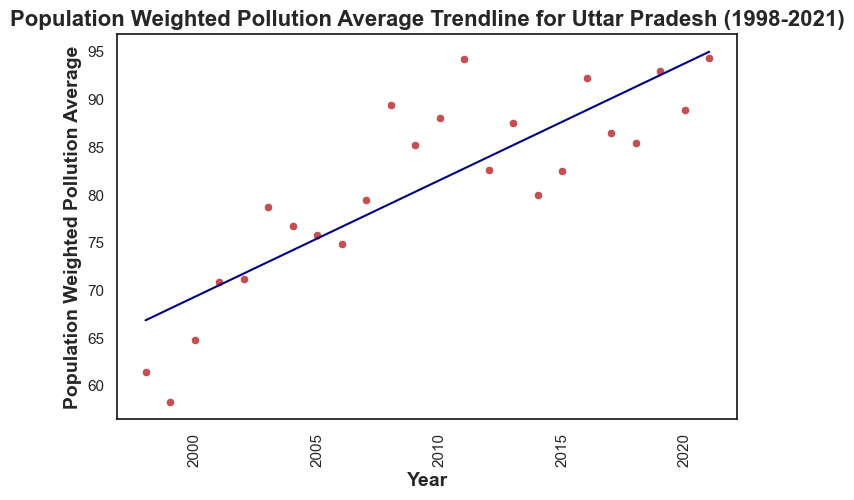

In [24]:
x = up_data['Year'].astype(float) 
y = up_data['Pol_pop_avg'].astype(float)
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

sns.scatterplot(x=x, y=y, color='r', ax=ax)

ax.set_xlabel('Year', fontsize=14, fontweight='bold')
ax.set_ylabel('Population Weighted Pollution Average', fontsize=14, fontweight='bold')
ax.set_facecolor('white')
ax.spines[['top', 'bottom', 'left', 'right']].set_color('k')
ax.set_title('Population Weighted Pollution Average Trendline for Uttar Pradesh (1998-2021)', 
             fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
ax.grid(False)

slope, intercept = np.polyfit(x, y, 1)
trendline = slope * x + intercept
ax.plot(x, trendline, color='navy', label='Trendline')
plt.savefig('/Users/harisankar/Work/Harris/Job/EPIC India/AQLI Data Test/Output/Pollution trendline.png', dpi=300)
plt.show()

## 2.2 Geospatial tasks and questions

1. Plot a bar graph for the life years lost relative to the WHO guideline in the 10 most polluted
countries in the world and plot them on a global country level map. For the map, the 10 most
polluted country boundaries should be filled in with “dark red” and the rest of the map should
be grayed out. Save both the bar graph and the map as high-quality PNG files.

In [25]:
df_aqi['avg_life_years_lost'] = df_aqi.filter(like='llpp_who_').mean(axis=1) - df_aqi.filter(like='llpp_nat_'
                                                                                            ).mean(axis=1)
average_data = df_aqi.groupby('country')['avg_life_years_lost'].mean().nlargest(10).reset_index()
average_data.head()

,country,avg_life_years_lost
0,India,2.703419
1,China,2.405121
2,Bosnia and Herzegovina,1.717037
3,Vietnam,1.611487
4,Peru,1.609667


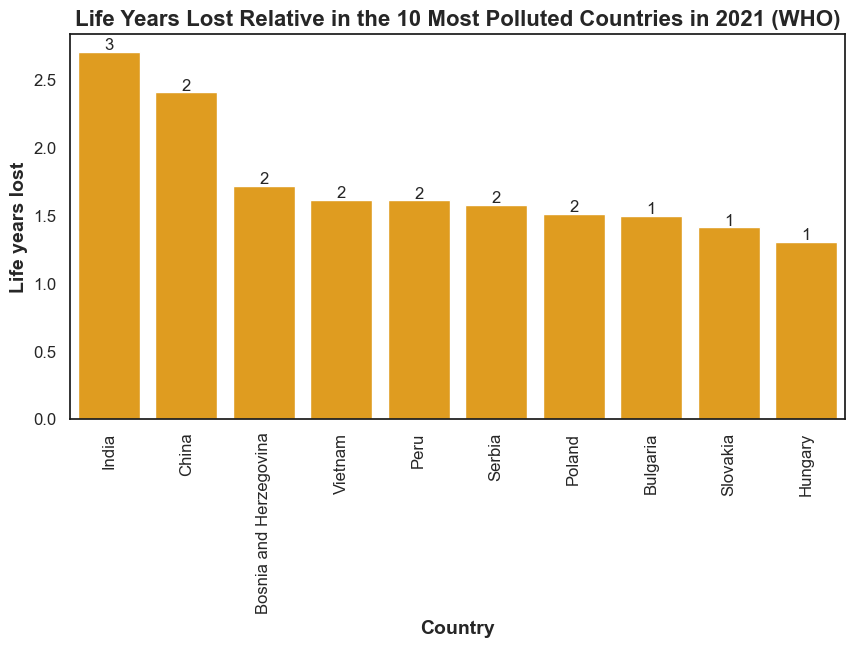

In [26]:
sns.set()
fig, ax=plt.subplots(figsize=(10,5))
ax = sns.barplot(x='country', y='avg_life_years_lost', data=average_data, color='orange', errorbar=None)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,
                 bar.get_height()), ha='center', va='center',size=12, xytext=(0, 5),
                textcoords='offset points')
ax.set_title('Life Years Lost Relative in the 10 Most Polluted Countries in 2021 (WHO)', 
             fontsize=16, fontweight='bold')
ax.set_xlabel('Country', fontsize=14, fontweight='bold')
ax.set_ylabel('Life years lost', fontsize=14, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_facecolor('white')
plt.xticks(rotation = 90)
ax.spines[['top', 'bottom', 'left', 'right']].set_color('k')
ax.grid(False)
plt.savefig('/Users/harisankar/Work/Harris/Job/EPIC India/AQLI Data Test/Output/Life years lost.png', dpi=300)
plt.show();

/var/folders/rj/zvrgtb452zzf5rvlqthd6n300000gn/T/ipykernel_20105/1260192480.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


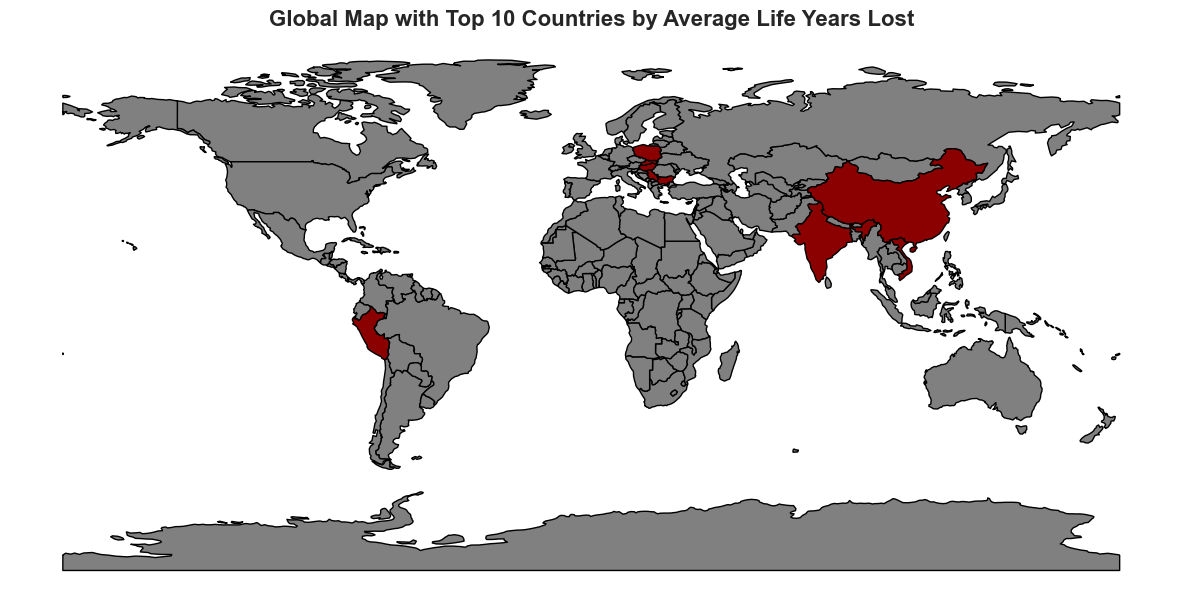

In [27]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world['fill_color'] = 'gray'
world.loc[world['name'].isin(average_data['country']), 'fill_color'] = 'darkred'
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color=world['fill_color'], edgecolor='black')
ax.set_title('Global Map with Top 10 Countries by Average Life Years Lost', fontsize=16, fontweight='bold')
ax.axis('off')
plt.savefig('/Users/harisankar/Work/Harris/Job/EPIC India/AQLI Data Test/Output/Top 10 Countries by Average Life Years Lost.png', dpi=300)
plt.show()

2. Create a potential gain in life expectancy (relative to the WHO guideline) map of eastern v/s
western europe at GADM level 2 and save it as a high-quality PDF.
a. Plot should be in AQLI “Potential gain in life expectancy” color scale. Visit AQLI
website Index page > See legend for “Potential gain in life expectancy” and infer
“exact” colors from that.
b. You can define east and west europe based on any acceptable definition online, but
whatever definition you use - mention the source.
c. Feel free to add annotations/text boxes etc. to help explain the visualization.

In [28]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[world.continent == 'Europe']

/var/folders/rj/zvrgtb452zzf5rvlqthd6n300000gn/T/ipykernel_20105/296129739.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [29]:
shp_path = '/Users/harisankar/Work/Harris/Job/EPIC India/AQLI Data Test/gadm2_aqli_shapefile/aqli_gadm2_final_june302023.shp'
gdf = gpd.read_file(shp_path)
merged_data = gdf.merge(df_aqi, how='left', left_on='obidgadm2', right_on='objectid_gadm2')
merged_data.head()

,obidgadm2,name0,name1,name2,geometry,objectid_gadm2,iso_alpha3,country,name_1,name_2,...,weighted_avg_pm2013,weighted_avg_pm2014,weighted_avg_pm2015,weighted_avg_pm2016,weighted_avg_pm2017,weighted_avg_pm2018,weighted_avg_pm2019,weighted_avg_pm2020,weighted_avg_pm2021,avg_life_years_lost
0,1,Afghanistan,Badakhshan,Baharak,"POLYGON ((71.41149 36.55717, 71.40954 36.55237...",1,AFG,Afghanistan,Badakhshan,Baharak,...,917136.00,973501.65,1013626.35,1107250.65,1093875.75,877011.30,934332.30,1004072.85,1022224.50,0.498750
1,2,Afghanistan,Badakhshan,Darwaz,"POLYGON ((71.27620 38.00465, 71.27578 38.00471...",2,AFG,Afghanistan,Badakhshan,Darwaz,...,222426.60,249814.95,252581.45,262264.20,273606.85,224363.15,244558.60,254518.00,243728.65,0.372917
2,3,Afghanistan,Badakhshan,Fayzabad,"POLYGON ((70.78272 37.27678, 70.78635 37.27388...",3,AFG,Afghanistan,Badakhshan,Fayzabad,...,2868817.51,3080426.81,3201346.41,3494576.44,3382725.81,2729759.97,2977645.15,3285990.13,3270875.18,0.488333
3,4,Afghanistan,Badakhshan,Ishkashim,"POLYGON ((71.41149 36.55717, 71.40091 36.56163...",4,AFG,Afghanistan,Badakhshan,Ishkashim,...,180511.10,194255.60,193889.08,233473.24,221194.82,175379.82,186925.20,190223.88,200486.44,0.530417
4,5,Afghanistan,Badakhshan,Jurm,"POLYGON ((70.71236 37.07621, 70.73582 37.06548...",5,AFG,Afghanistan,Badakhshan,Jurm,...,957175.44,1010037.20,1046851.64,1163902.68,1130864.08,905257.64,979830.48,1042131.84,1069506.68,0.542500


In [30]:
merged_data['avg_life_years_gained'] = merged_data.filter(like='llpp_who_'
                                                         ).mean(axis=1) - merged_data.filter(like='llpp_nat_'
                                                                                            ).mean(axis=1) 

# Source of classification of countries to Eastern and Western Europe: https://unstats.un.org/unsd/methodology/m49/
eastern_europe_countries = ['Belarus', 'Bulgaria', 'Czechia', 'Hungary', 'Moldova', 
                            'Poland', 'Romania', 'Russia', 'Slovakia', 'Ukraine']
western_europe_countries = ['Austria', 'Belgium', 'France', 'Germany', 'Luxembourg', 'Netherlands', 'Switzerland']

merged_data['region'] = 'Other'
merged_data.loc[merged_data['country'].isin(eastern_europe_countries), 'region'] = 'Eastern Europe'
merged_data.loc[merged_data['country'].isin(western_europe_countries), 'region'] = 'Western Europe'


e_europe_data = merged_data[merged_data['region'].isin(['Eastern Europe'])]
w_europe_data = merged_data[merged_data['region'].isin(['Western Europe'])]


/var/folders/rj/zvrgtb452zzf5rvlqthd6n300000gn/T/ipykernel_20105/2422797442.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('YlOrBr', len(colors) - 1)


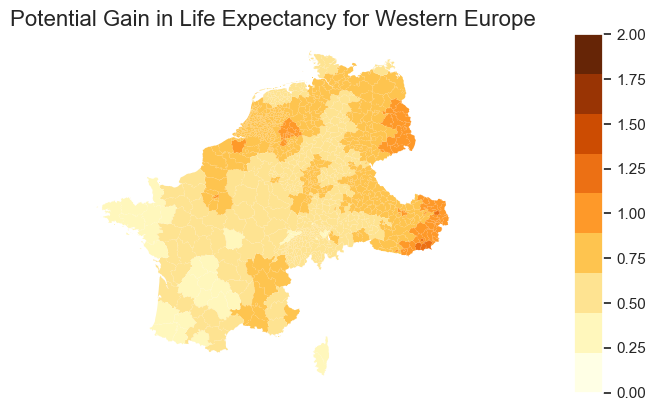

In [31]:
colors = [0, 0.1, 0.5, 1, 2, 3, 4, 5, 6, np.inf]
cmap = plt.cm.get_cmap('YlOrBr', len(colors) - 1)
norm = BoundaryNorm(colors, cmap.N, clip=True)

sns.set()
fig, ax = plt.subplots(figsize=(8,6))
fig.tight_layout(pad=4)
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)

w_europe_data.plot(column='avg_life_years_gained', ax=ax, cmap=cmap, edgecolor='black', linewidth=0.0, 
                   legend=True, cax=cax, vmin=0, vmax=2)
ax.set_title('Potential Gain in Life Expectancy for Western Europe', fontsize=16)
ax.axis('off')
ax.grid(False)

plt.savefig('/Users/harisankar/Work/Harris/Job/EPIC India/AQLI Data Test/Output/Life years gained Western Europe.pdf', format='pdf', dpi=300)
plt.show()

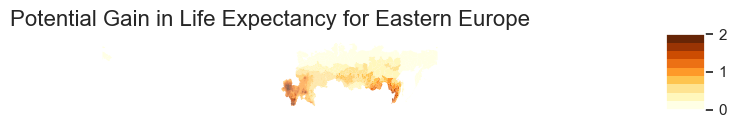

In [32]:
sns.set()
fig, ax = plt.subplots(figsize=(10,6))
fig.tight_layout(pad=4)
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)

e_europe_data.plot(column='avg_life_years_gained', ax=ax, cmap=cmap, edgecolor='black', linewidth=0.0, 
                   legend=True, cax=cax, vmin=0, vmax=2)
ax.set_title('Potential Gain in Life Expectancy for Eastern Europe', fontsize=16)
ax.axis('off')
ax.grid(False)

plt.savefig('/Users/harisankar/Work/Harris/Job/EPIC India/AQLI Data Test/Output/Life years gained Eastern Europe.pdf', format='pdf', dpi=300)
plt.show()

Note: There is an issue here as some parts of Eastern Europe are not will the major part and that needs to be modified at the shapefile. Would be much easier to make that edit using GIS as we can easily identify those polygons. Tried preparing both the maps into a single pdf similar to earlier plots but it showing the following error - AttributeError: 'numpy.ndarray' object has no attribute 'plot'.

3. Look at the AQLI website > switch to Air pollution tab > plot a static version of the global
pollution map you see there, in those “exact” same colors. Export it as a high quality (320
dpi) SVG file.

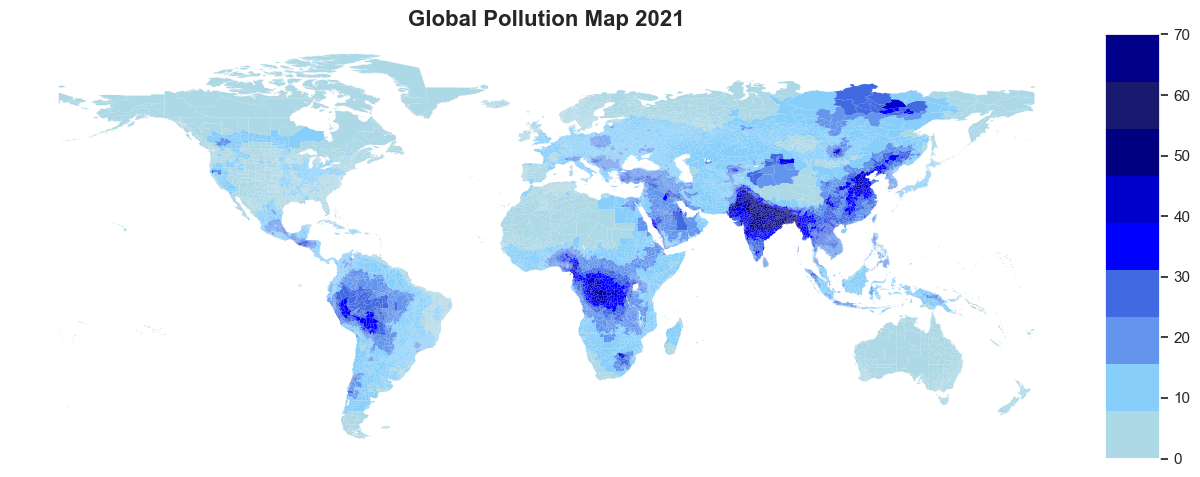

In [33]:
pollution_2021 = merged_data[['geometry', 'pm2021']]
colors = ['lightblue', '#87CEFA', '#6495ED', '#4169E1', '#0000FF', '#0000CD', '#000080', '#191970', 'darkblue']
cmap = plt.cm.colors.ListedColormap(colors)

levels = [0, 5, 10, 20, 30, 40, 50, 60, 70]

fig, ax = plt.subplots(figsize=(15, 10))
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
pollution_2021.plot(column='pm2021', cmap=cmap, linewidth=0.0, ax=ax, legend=True, vmin=0, vmax=70, cax=cax)
ax.set_title('Global Pollution Map 2021', fontsize=16, fontweight='bold')
ax.axis('off')

plt.savefig('/Users/harisankar/Work/Harris/Job/EPIC India/AQLI Data Test/Output/Global pollution 2021.svg', dpi=320)
plt.show()